In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

In [6]:
from amazon_reviews import get_dataset_word2vec
from cbow import CBOW
from amazon_reviews import get_most_similar_words
from sklearn.manifold import TSNE
from amazon_reviews import find_unique_word_counts
from amazon_reviews import make_word2ind_mapping, make_ind2word_mapping

In [7]:
targets_int, contexts_int, vocab, corpus = get_dataset_word2vec(N_reviews=40000, corpus_return=True)
word2ind = make_word2ind_mapping(vocab)
ind2word = make_ind2word_mapping(vocab)
print(f'Number of target words in actual Amazon corpus: {len(targets_int)}. There should be 5434338.')
print(f'Number of context words in actual Amazon corpus: {len(contexts_int)}. There should be 5434338.')
print(f'Vocab size in actual Amazon corpus: {len(vocab)}. It should be 21905.')

Number of target words in actual Amazon corpus: 5434338. There should be 5434338.
Number of context words in actual Amazon corpus: 5434338. There should be 5434338.
Vocab size in actual Amazon corpus: 21905. It should be 21905.


In [8]:
# LOAD IN SAVED EMBEDDINGS
embeddings = np.load('export/embeddings.npz')
embeddings = embeddings['embeddings']

tsne = TSNE(n_components=2)
word_tsne = tsne.fit_transform(embeddings)
print(embeddings.shape)
print(word_tsne.shape)

(21905, 96)
(21905, 2)


Words most similar to great:
0: great (similarity=1.0000)
1: good (similarity=0.7921)
2: fantastic (similarity=0.7891)
3: perfect (similarity=0.7261)
4: wonderful (similarity=0.7197)
5: amazing (similarity=0.7195)
6: nice (similarity=0.7052)
7: awesome (similarity=0.6948)
8: terrific (similarity=0.6939)
9: excellent (similarity=0.6930)
10: fabulous (similarity=0.6444)
11: decent (similarity=0.6403)
12: excelent (similarity=0.6017)
13: lovely (similarity=0.5726)
14: fine (similarity=0.5700)
15: slouchier (similarity=0.5642)
16: tradeshows (similarity=0.5616)
17: finr (similarity=0.5593)
18: outstanding (similarity=0.5572)
19: ok (similarity=0.5527)
20: cool (similarity=0.5500)
21: awsome (similarity=0.5467)
22: securer (similarity=0.5463)
23: perfectly (similarity=0.5397)
24: vbs (similarity=0.5369)
25: wonderfully (similarity=0.5337)


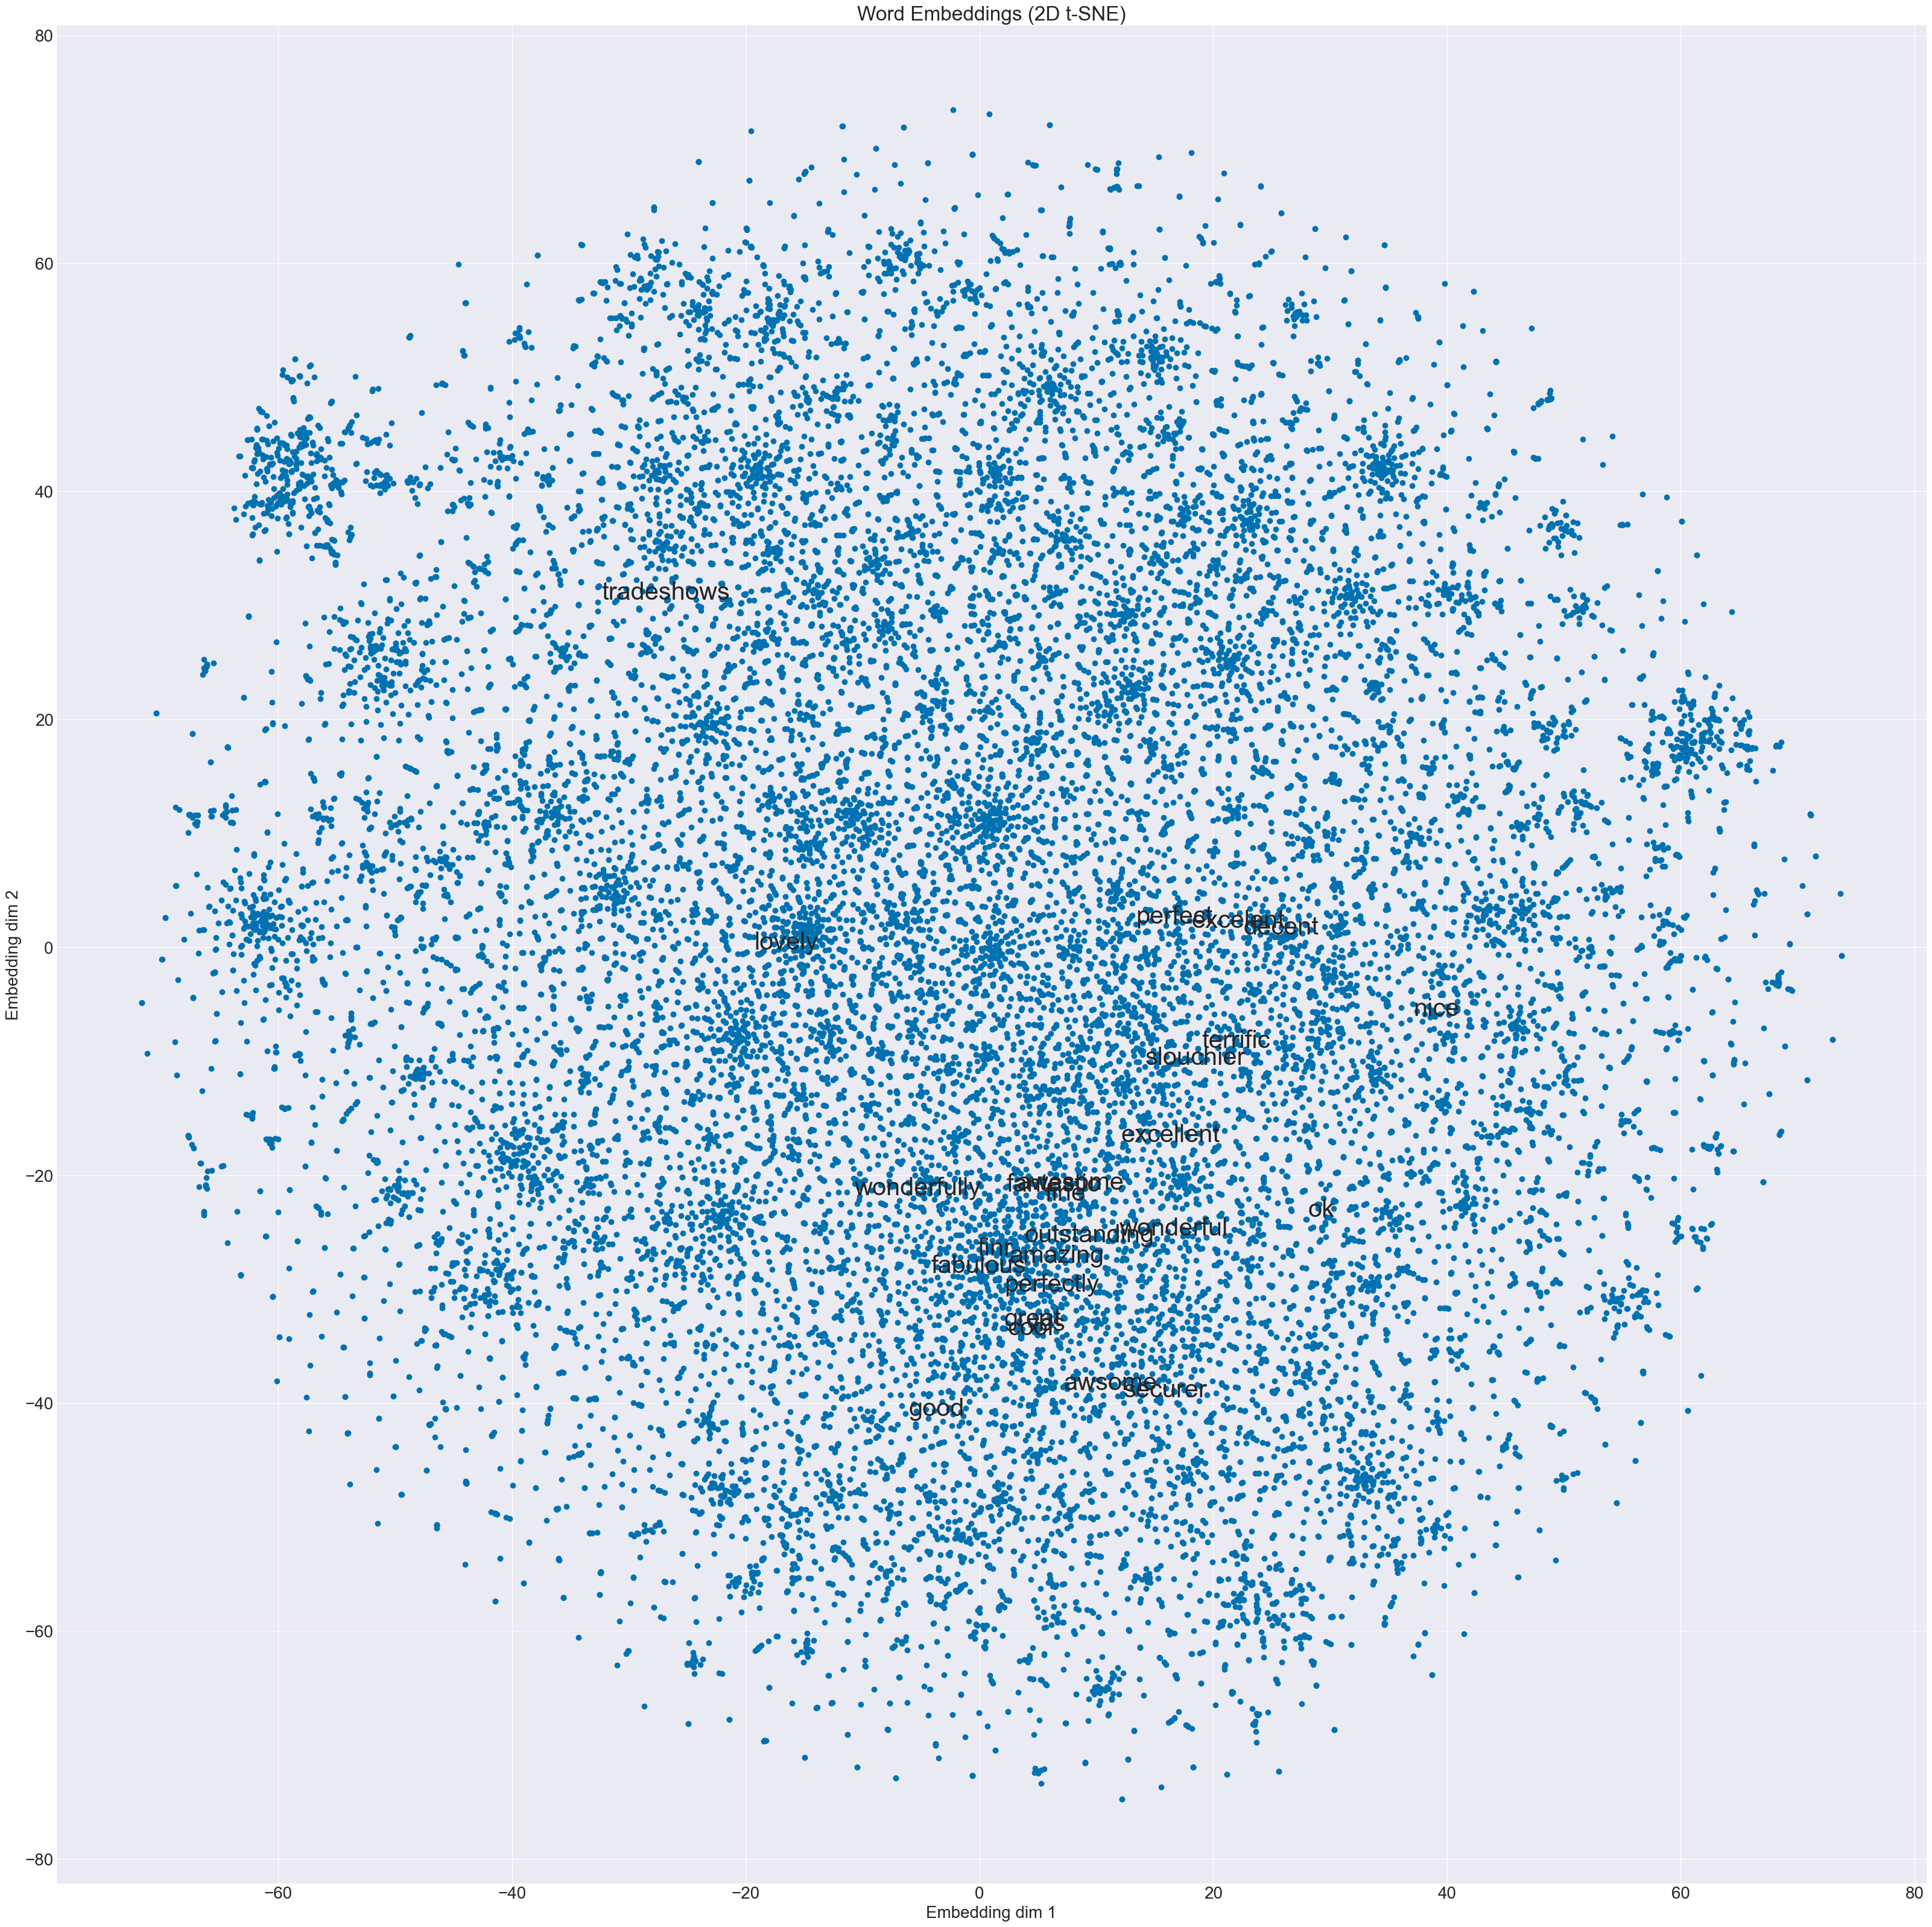

In [9]:
query_word = 'great'
topk_word_inds, topk_cossim = get_most_similar_words(k=25,
                                                     all_embeddings=embeddings,
                                                     word_str=query_word,
                                                     word_str2int=word2ind)


word_strs = [ind2word[ind] for ind in topk_word_inds]

print(f'Words most similar to {query_word}:')
for k0 in range(len(topk_word_inds)):
    print(f'{k0}: {ind2word[topk_word_inds[k0]]} (similarity={topk_cossim[k0]:.4f})')

# Visualize word cloud — each word as (x, y) coords
plt.figure(figsize=(40, 40))
plt.scatter(word_tsne[:, 0], word_tsne[:, 1])

max_xy = 5
rng = np.random.default_rng(0)
offsets = rng.uniform(low=-max_xy, high=max_xy, size=(len(word_strs), 2))
for w in range(len(word_strs)):
    plt.annotate(word_strs[w], (word_tsne[w, 0]+offsets[w,0], word_tsne[w, 1]+offsets[w,0]), fontsize=30)

plt.title('Word Embeddings (2D t-SNE)')
plt.xlabel('Embedding dim 1')
plt.ylabel('Embedding dim 2')
plt.show()

In [21]:
from sklearn.cluster import KMeans
from collections import defaultdict

In [ ]:
# 1. Choose number of clusters
k = 10

# 2. Fit K-means on your 2D t-SNE embeddings
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
labels = kmeans.fit_predict(word_tsne)  # word_tsne shape: [vocab_size, 2]

# 3. Group word indices by cluster
clusters = defaultdict(list)
for idx, cluster_id in enumerate(labels):
    clusters[cluster_id].append(idx)

# 4. (Optional) Sort words within each cluster by their original frequency, 
#    or by distance to the cluster center in t-SNE space. Here we’ll leave unsorted:
for cluster_id in range(k):
    word_list = [ ind2word[i] for i in clusters[cluster_id] ]
    print(f"\nCluster {cluster_id} — {len(word_list)} words:")
    # print first 20 as a sample
    print(", ".join(word_list[:20]))



Cluster 0 — 2264 words:
tieks, kid, year, olds, son, fan, easter, daughter, law, replacement, rate, grand, pilates, tiles, husband, cash, who, grandchildren, mavi, sister

Cluster 1 — 2033 words:
i, think, really, you, could, photo, need, me, expected, bought, dont, love, always, have, order, appreciate, ill, buy, again, hopefully

Cluster 2 — 2384 words:
pretty, very, crappy, stylish, sturdy, too, heavy, cute, warm, nice, inexpensive, rough, uncomfortable, way, made, flattering, chiffon, knit, weigh, lbs

Cluster 3 — 1538 words:
regular, pair, five, stars, shirt, t, br, xxl, bra, dress, xl, tshirt, she, shes, two, he, item, scarf, styled, hat

Cluster 4 — 2552 words:
medication, rectangular, friendly, ninjago, bit, little, few, collector, handily, tablecloth, 0x, reposition, pleasant, turtle, forest, baseball, lot, peacock, 'hidden', consideration

Cluster 5 — 2076 words:
depression, store, first, socks, these, glasses, sunglasses, size, compliments, package, chart, cutest, name, jea

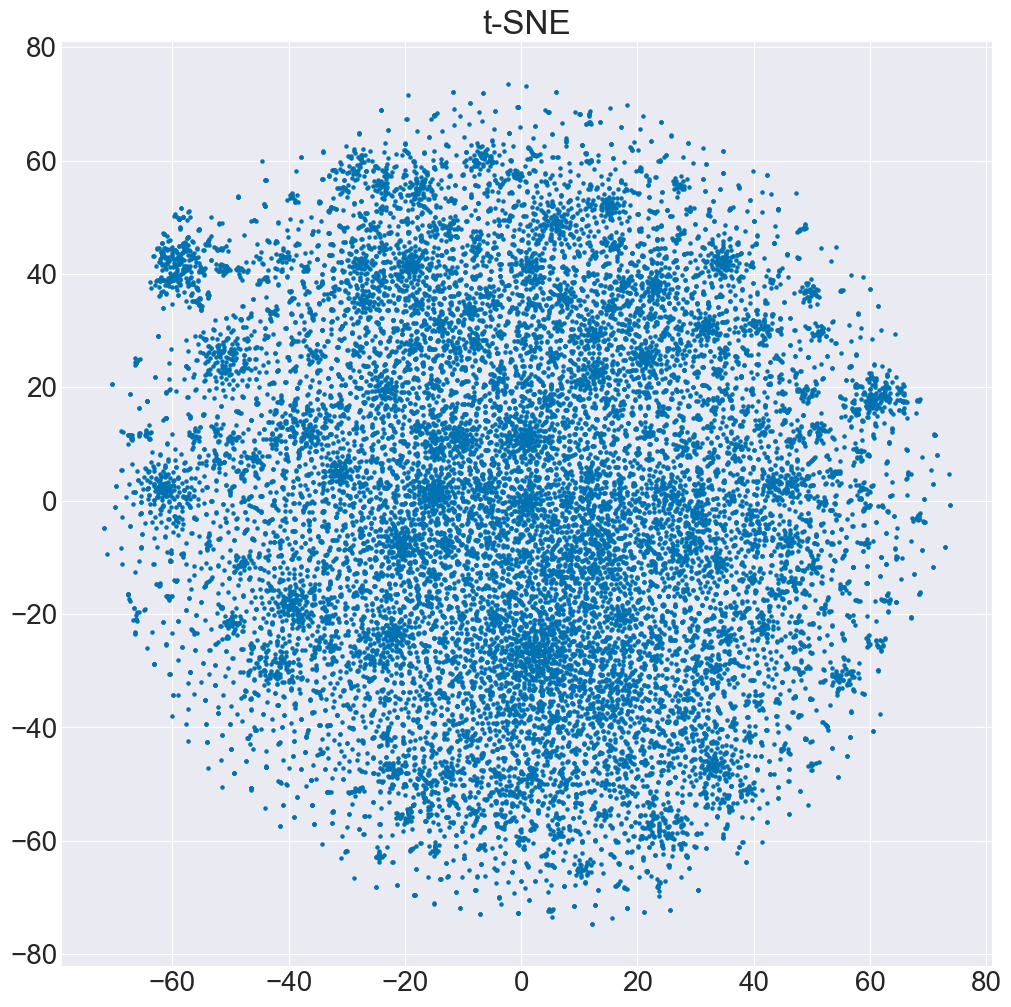

In [19]:
plt.figure(figsize=(12,12))
plt.scatter(word_tsne[:,0], word_tsne[:,1], s=5)
plt.title('t-SNE')
plt.show()


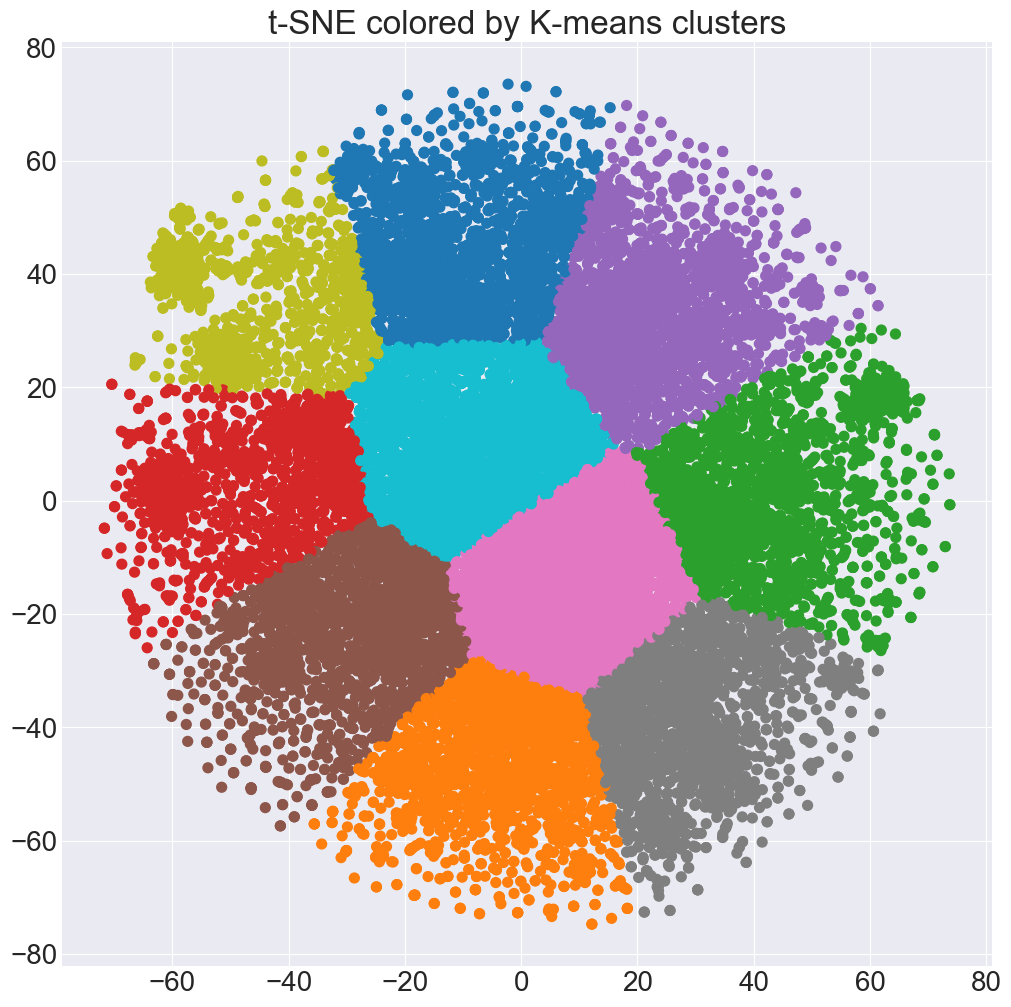

In [20]:

plt.figure(figsize=(12, 12))
plt.scatter(word_tsne[:,0], word_tsne[:,1], c=labels, cmap='tab10', s=50)
plt.title('t-SNE colored by K-means clusters')
plt.show()


# k = 100

In [ ]:
k = 100

kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
labels = kmeans.fit_predict(word_tsne)

clusters = defaultdict(list)
for idx, cluster_id in enumerate(labels):
    clusters[cluster_id].append(idx)

for cluster_id in range(k):
    word_list = [ ind2word[i] for i in clusters[cluster_id] ]
    print(f"\nCluster {cluster_id} — {len(word_list)} words:")
    # print first 20 as a sample
    print(", ".join(word_list[:20]))



Cluster 0 — 178 words:
again, recommend, highly, hesitate, gone, eyeballing, consider, gravitate, classify, readjusting, sight, recomend, suggest, inherited, categorize, lived, beatifully, torrential, downpours, continously

Cluster 1 — 165 words:
samsung, church, beach, essential, unbiased, galaxy, smart, schitts, creek, lunch, selects, disney, honest, apple, 40mm, electric, archs, x4, gravity, notorious

Cluster 2 — 218 words:
proof, gum, theses, loader, soap, shampoo, moths, marginal, unattractive, disheveled, childish, speeds, bottle, tooth, plasticky, conscience, tuxedo, sacrificing, upscale, glean

Cluster 3 — 325 words:
inside, front, lock, closes, top, pocket, inserts, filters, filter, edges, sleeves, pleated, area, bottom, sides, bands, screws, insert, tab, band

Cluster 4 — 212 words:
socks, jeans, yoga, classes, gloves, bike, pants, shorts, capri, leggings, heels, clothing, shirts, bras, capris, ons, dresses, swimsuits, clothes, tanks

Cluster 5 — 229 words:
friendly, repla

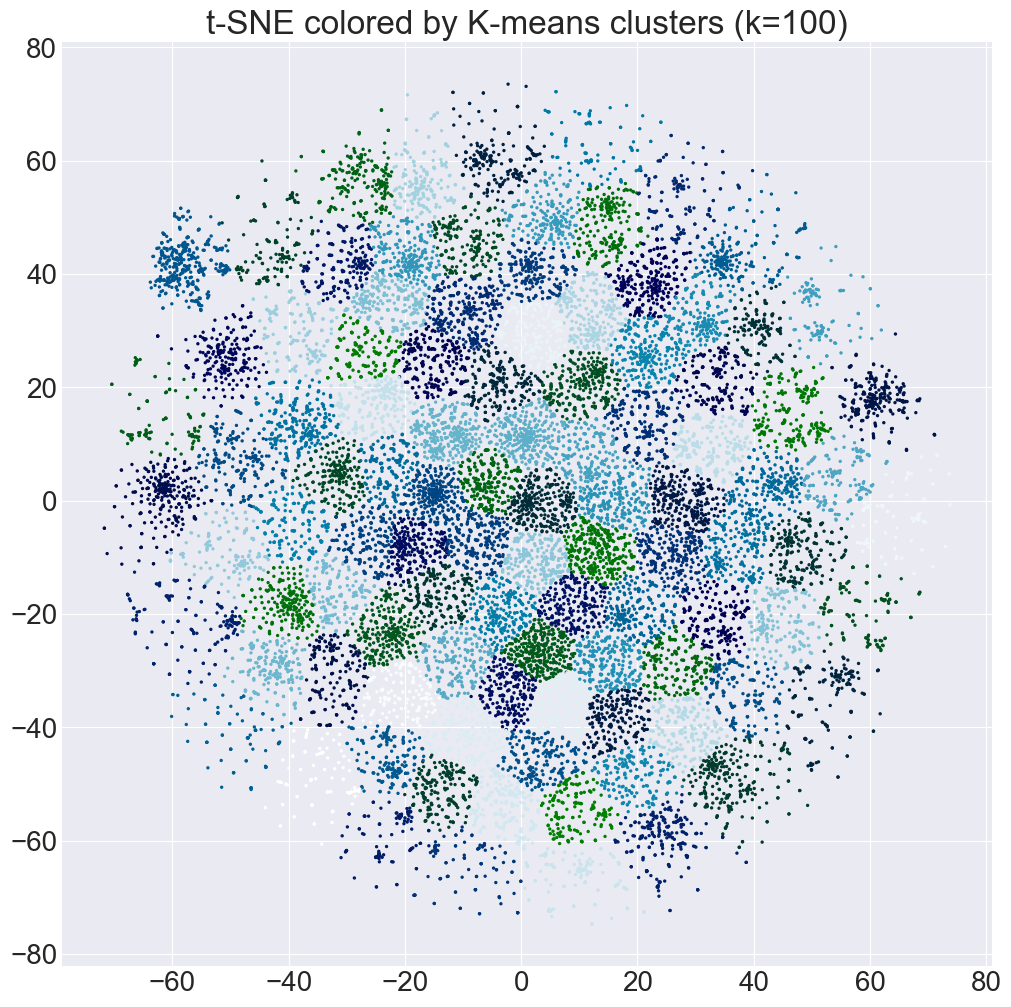

In [32]:
plt.figure(figsize=(12, 12))
plt.scatter(word_tsne[:,0], word_tsne[:,1], c=labels, cmap='ocean', s=2)
plt.title(f't-SNE colored by K-means clusters (k={k})')
plt.show()

In [33]:
k = 1000

kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
labels = kmeans.fit_predict(word_tsne)

clusters = defaultdict(list)
for idx, cluster_id in enumerate(labels):
    clusters[cluster_id].append(idx)

for cluster_id in range(k):
    word_list = [ ind2word[i] for i in clusters[cluster_id] ]
    print(f"\nCluster {cluster_id} — {len(word_list)} words:")
    # print first 20 as a sample
    print(", ".join(word_list[:20]))



Cluster 0 — 18 words:
graduated, jagged, feat, raw', deceptively, calendar, shapeable, cycled, 'gold', weathered, 4oz, movado, fiery, 'screw, down', daytona, websits, 1yr

Cluster 1 — 33 words:
really, me, what, attention, absolutely, him, how, honestly, kinda, why, truly, cow, called, totally, everything, crazy, completely, saying, darn, wow

Cluster 2 — 20 words:
aviator, b08f7qq11t, sonja, rofarso, betro, boston, theater, danne, panvbo, crndzsis, outweighed, vesta, jolin, ourin, b004r05p3q, cocoship, b01beay0nc, jj, quib, gtr

Cluster 3 — 32 words:
arthritis, longsleeve, mommy, irritated, settings, monroe, rounding, camouflages, noses, tum, itches, blind, bypass, c5, c6, osteoarthritis, dew, frome, cranny, inflamed

Cluster 4 — 31 words:
investigating, eddie, bauer, counterfeit, thirds, pollen, schnauzer, standardized, overbearingly, strudy, witty, scrawny, viruses, goog, quiality, lou, exhaled, vhina, moss, agate

Cluster 5 — 21 words:
sleeves, ends, center, slit, trim, edge, slee

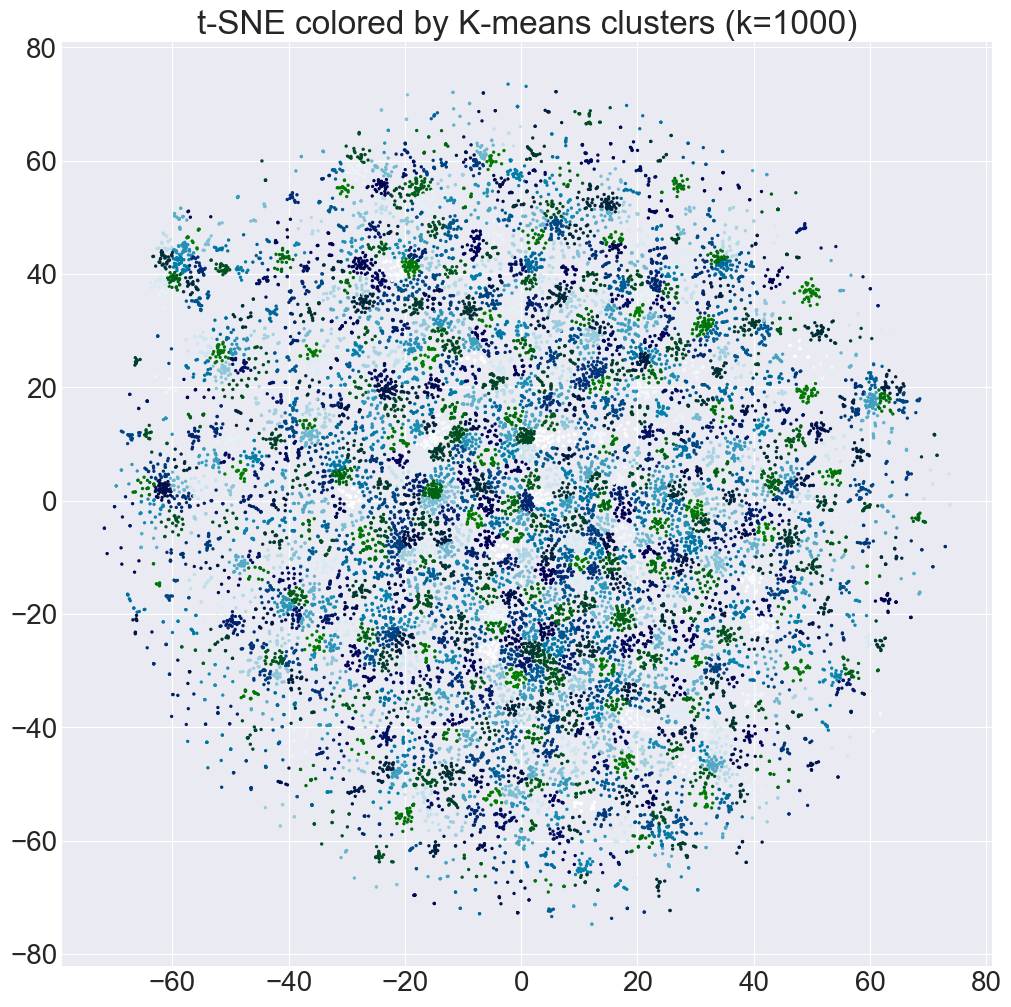

In [34]:
plt.figure(figsize=(12, 12))
plt.scatter(word_tsne[:,0], word_tsne[:,1], c=labels, cmap='ocean', s=2)
plt.title(f't-SNE colored by K-means clusters (k={k})')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Suppose you've run:
# tsne = TSNE(n_components=3)
# word_tsne_3d = tsne.fit_transform(embeddings)   # shape: [vocab_size, 3]

# 1. Choose your number of clusters
k = 10

# 2. Fit K‑means on the 3D coordinates
kmeans_3d = KMeans(n_clusters=k, random_state=0, n_init=10)
labels_3d = kmeans_3d.fit_predict(word_tsne_3d)

# 3. Group word indices by cluster
from collections import defaultdict
clusters_3d = defaultdict(list)
for idx, cl in enumerate(labels_3d):
    clusters_3d[cl].append(idx)

# 4. Print a sample of words in each cluster
for cl in range(k):
    words = [ind2word[i] for i in clusters_3d[cl]]
    print(f"Cluster {cl} ({len(words)} words): {', '.join(words[:20])} …")


In [ ]:
# RUNNN TSNE to give three dimensions!!
tsne_3d = TSNE(n_components=3)
word_tsne_3d = tsne_3d.fit_transform(embeddings)

In [ ]:
# 1. Choose your number of clusters
k = 10

# 2. Fit K‑means on the 3D coordinates
kmeans_3d = KMeans(n_clusters=k, random_state=0, n_init=10)
labels_3d = kmeans_3d.fit_predict(word_tsne_3d)

# 3. Group word indices by cluster
from collections import defaultdict
clusters_3d = defaultdict(list)
for idx, cl in enumerate(labels_3d):
    clusters_3d[cl].append(idx)

# 4. Print a sample of words in each cluster
for cl in range(k):
    words = [ind2word[i] for i in clusters_3d[cl]]
    print(f"Cluster {cl} ({len(words)} words): {', '.join(words[:20])} …")
